In [27]:
#Importing Libraries
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image
import requests
from io import BytesIO

In [28]:
# Load the Magenta Arbitrary Image Stylization model from TensorFlow Hub
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [29]:
# Loads an image from a file path, decodes it, converts to float32, and adds a batch dimension
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [36]:
#Url to images
content_image_url = 'https://cdn.pixabay.com/photo/2016/11/29/13/14/attractive-1869761_1280.jpg'
style_image_url = 'https://c4.wallpaperflare.com/wallpaper/821/500/941/painting-vincent-van-gogh-abstract-the-starry-night-wallpaper-thumb.jpg'

# Download and save the content image
response = requests.get(content_image_url)
img1 = Image.open(BytesIO(response.content))
img1.save('content.jpg')

# Download and save the style image
response = requests.get(style_image_url)
img2 = Image.open(BytesIO(response.content))
img2.save('style.jpg')

#Load Images
content_image = load_image('content.jpg')
style_image = load_image('style.jpg')

In [37]:
# Apply style transfer to the content image using the style image
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

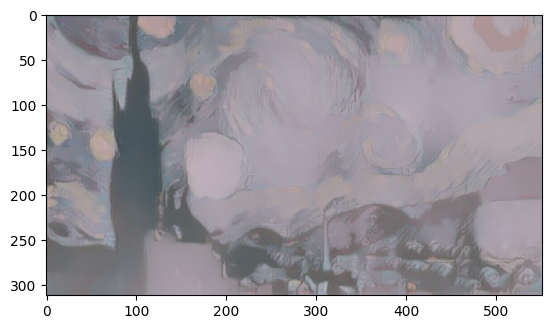

In [38]:
#Display Output
plt.imshow(np.squeeze(stylized_image))
plt.show()